In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mdp_policy import gridworld, maze_plotter, gridworld_wall

pygame 2.1.0 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def get_stats(it_list, thresh=30):
    fail = 0
    goal = 0
    optimal_goal = 0
    
    for i in range(len(it_list)):
        if it_list[i] == 200:
            fail += 1
        elif it_list[i]<thresh:
            optimal_goal += 1
        else:
            goal += 1 
    return fail, goal, optimal_goal

In [3]:
env = gridworld()

<IPython.core.display.Javascript object>


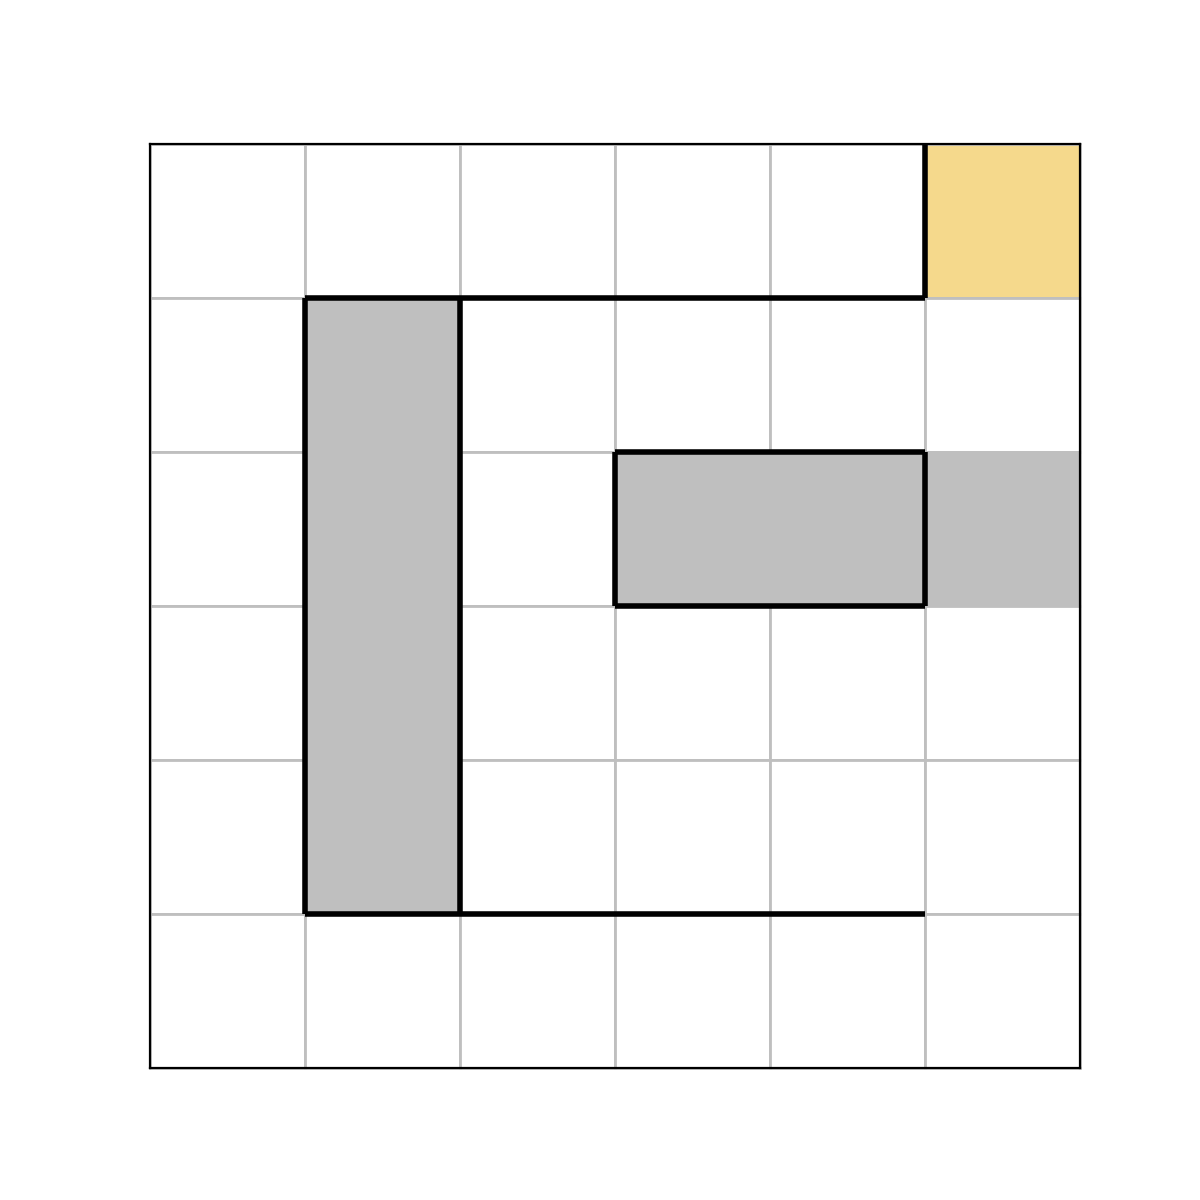

In [22]:
plotter = maze_plotter(env, 5, gray=[17])
plotter.simple_render(V=[], policy=[], render=False)


In [26]:
env = gridworld_wall(walls=[7, 13, 15, 16, 17, 19, 25],h_walls=[[0, 1, [1, 2, 3, 4]], [1, 2, [3, 4, 5]], [2, 3, [3, 4, 5]], [4, 5, [1, 2, 3, 4]]],v_walls=[[0, 1, [1, 2, 3, 4]], [1, 2, [1, 2, 3, 4]], [4, 5, [0]], [2, 3, [2]] ])

<IPython.core.display.Javascript object>


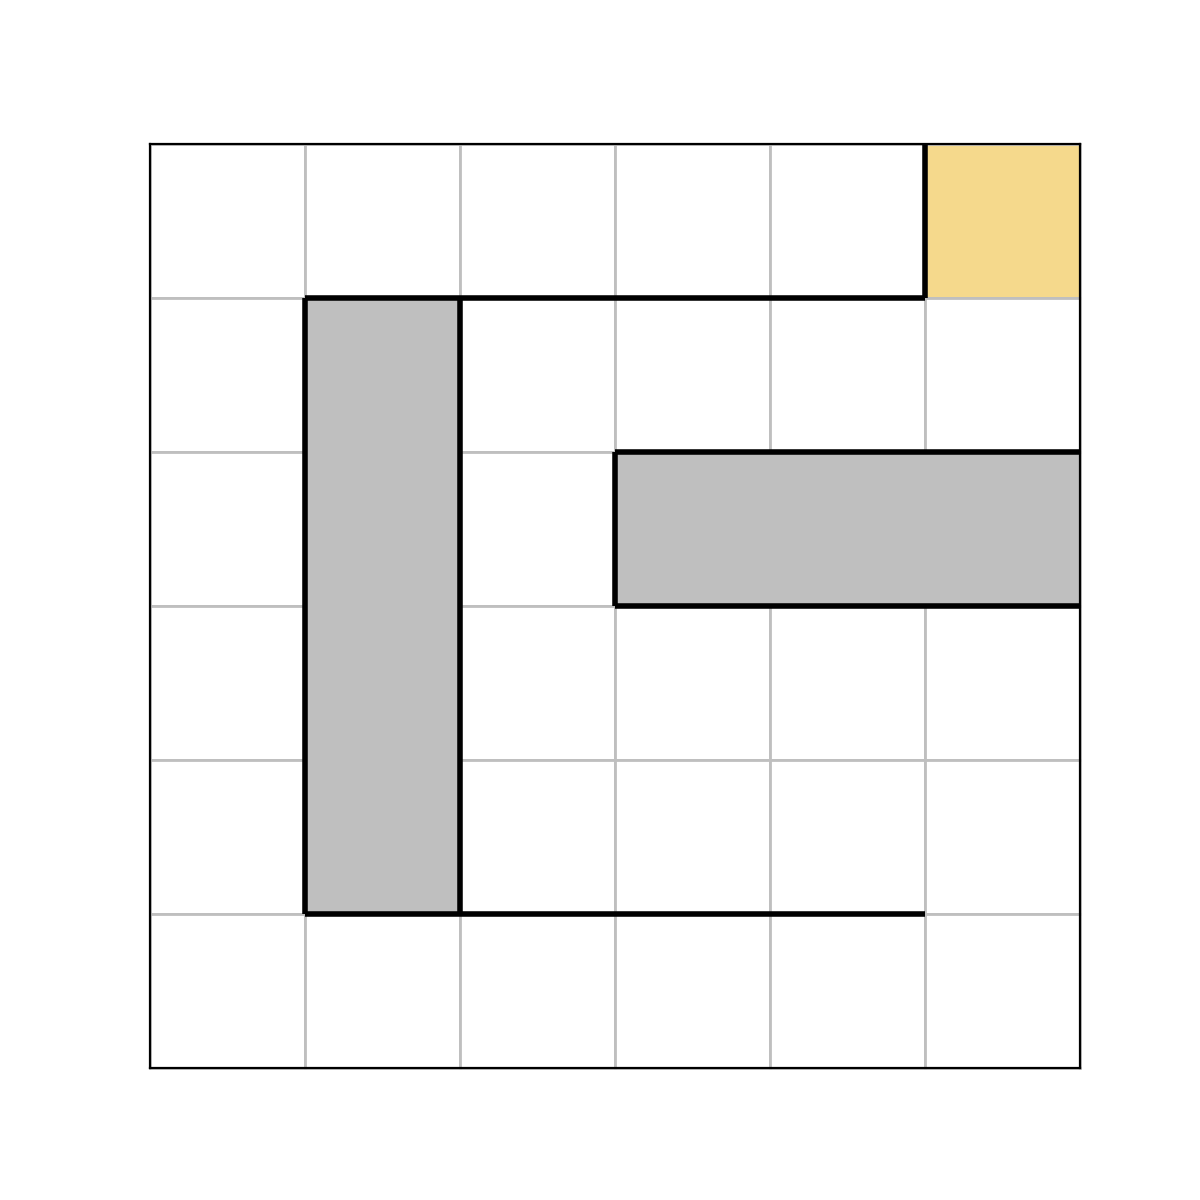

In [27]:
plotter = maze_plotter(env, 5)
plotter.simple_render(V=[], policy=[], render=False)

### Plot training

In [3]:
path = "output/grid/TAMER/Train"

num_runs = 5

reward_trial = []

for i in range(num_runs):
    log_path = os.path.join(path, str(i))
    data = pd.read_csv(log_path+f"/{str(i)}.csv")
    steps_tamer = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

tamer = np.array(reward_trial)
tamer_mean = np.mean(tamer , axis=0)
tamer_std = np.std(tamer, axis=0)

In [4]:
path = "output/grid/INFORM/Train"

num_runs = 5

reward_trial = []

for i in range(num_runs):
    log_path = os.path.join(path, str(i))
    data = pd.read_csv(log_path+f"/{str(i)}.csv")
    steps_inform = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

inform = np.array(reward_trial)
inform_mean = np.mean(inform , axis=0)
inform_std = np.std(inform, axis=0)

In [5]:
expert = np.full(steps_inform.shape[0],18)

/tmp/ipykernel_8400/998871404.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2],     # The line objects


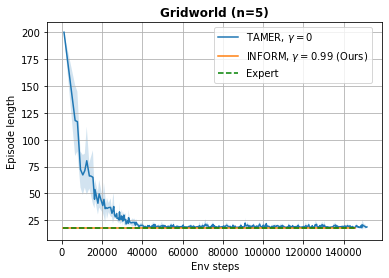

In [7]:
fig, ax = plt.subplots(1)

#y = np.arange(grid_offline_mean.shape[0])

l1 = ax.plot(steps_tamer[:725:2], tamer_mean[:725:2], label='TAMER')
l2 = ax.plot(steps_inform[:725:2], inform_mean[:725:2], label='INFORM')
l3 = ax.plot(steps_inform[:725:2], expert[:725:2], color ='g', linestyle='dashed', label='Expert')

ax.fill_between(steps_tamer[:725:2], tamer_mean[:725:2]+tamer_std[:725:2], tamer_mean[:725:2]-tamer_std[:725:2], alpha=0.2)
ax.fill_between(steps_inform[:725:2], inform_mean[:725:2]+ inform_std[:725:2], inform_mean[:725:2]- inform_std[:725:2], alpha=0.2)

labels = ["TAMER, $\gamma = 0$", "INFORM, $\gamma = 0.99$ (Ours)", "Expert"]

fig.legend([l1, l2],     # The line objects
           labels=labels,   # The labels for each line
           #loc="center right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.9),
           bbox_transform=fig.transFigure
           )

#ax.legend(loc='upper right')
ax.set_xlabel('Env steps')
ax.set_ylabel('Episode length')
ax.set_title("Gridworld (n=5)", fontweight="bold")
ax.grid()
fig.savefig("gridworld.pdf",bbox_inches='tight')

### Evaluation

In [17]:
def load(path):
    f = open(path, 'rb')
    liste = pickle.load(f)
    f.close()
    return liste

### Wall

In [10]:
path = "output/grid/QL/Train/Env"

num_runs = 5

reward_trial = []

for i in range(num_runs):
    log_path = os.path.join(path, str(i))
    data = pd.read_csv(log_path+f"/{str(i)}.csv")
    steps_env = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

env = np.array(reward_trial)
env_mean = np.mean(tamer , axis=0)
env_std = np.std(tamer, axis=0)

In [11]:
path = "output/grid/QL/Train/wall"

num_runs = 5

reward_trial = []

for i in range(num_runs):
    log_path = os.path.join(path, str(i))
    data = pd.read_csv(log_path+f"/{str(i)}.csv")
    steps_inform = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

inform = np.array(reward_trial)
inform_mean = np.mean(tamer , axis=0)
inform_std = np.std(tamer, axis=0)

In [12]:
tamer_wall = np.full(steps_inform.shape[0], 200)
expert = np.full(steps_inform.shape[0], 20)

/tmp/ipykernel_37249/2198555919.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4],     # The line objects


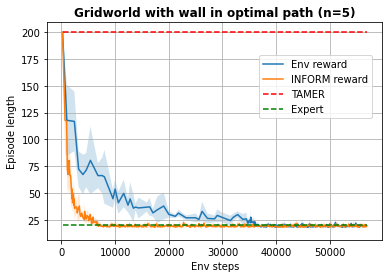

In [14]:
fig, ax = plt.subplots(1)

#y = np.arange(grid_offline_mean.shape[0])

l1 = ax.plot(steps_env[:500:2], env_mean[:500:2], label='env')
l2 = ax.plot(steps_inform[::2], inform_mean[::2], label='INFORM')
l3 = ax.plot(steps_inform[::2], tamer_wall[::2], color='r',linestyle='dashed', label='TAMER')
l4 = ax.plot(steps_inform[::2], expert[::2], color ='g', linestyle='dashed', label='Expert')


ax.fill_between(steps_env[:500:2], env_mean[:500:2]+env_std[:500:2], env_mean[:500:2]-env_std[:500:2], alpha=0.2)
ax.fill_between(steps_inform[::2], inform_mean[::2]+ inform_std[::2], inform_mean[::2]- inform_std[::2], alpha=0.2)

labels = ["Env reward", "INFORM reward", "TAMER", "Expert"]

fig.legend([l1, l2, l3, l4],     # The line objects
           labels=labels,   # The labels for each line
           #loc="center right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.8),
           bbox_transform=fig.transFigure
           )

#ax.legend(loc='upper right')
ax.set_xlabel('Env steps')
ax.set_ylabel('Episode length')
ax.set_title("Gridworld with wall in optimal path (n=5)", fontweight="bold")
ax.grid()
fig.savefig("wall.pdf",bbox_inches='tight')

### GIF

In [7]:
###TAMER

In [35]:
# docs and experiment results can be found at https://docs.cleanrl.dev/rl-algorithms/dqn/#dqnpy
import os
import random
import time
from dataclasses import dataclass
import pickle

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tyro
from stable_baselines3.common.buffers import ReplayBuffer
from torch.utils.tensorboard import SummaryWriter
from utils import flat_to_one_hot
from mdp_policy import gridworld, gridworld_wall



def make_env(env_id):
    if env_id == "grid":
        env = gridworld()
    elif env_id == "wall":
        env = gridworld_wall()
    return env



# ALGO LOGIC: initialize agent here:
class QNetwork(nn.Module):
    def __init__(self, env):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear( np.array(env.nb_states).prod(), 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, env.nb_actions),
        )

    def forward(self, x):
        return self.network(x)


def evaluate_wall(q_network):
    # env setup
    envs = make_env("wall")
    episode_length = []
    traj = []

    obs = envs.reset()
    done = False
    t = 0
    

    while not done and t != 50:
        traj.append(obs)
        obs_vector = flat_to_one_hot(obs, envs.nb_states)
        q_values = q_network(torch.Tensor(obs_vector).to(device))
        actions = torch.argmax(q_values, dim=-1).cpu().detach().numpy()
        next_obs, reward, done, info = envs.step(obs, actions, t)
        obs = next_obs
        #traj.append(obs)
        t += 1
    episode_length.append(t)

    return traj




seeds = [0]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

length_runs = []

for run in range(len(seeds)):
    print("RUN", run)
    seed = seeds[run]
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # env setup
    envs = make_env("wall")
    #assert isinstance(envs.single_action_space, gym.spaces.Discrete), "only discrete action space is supported"

    model_path = f"output/grid/TAMER/Train/{run}/q_model.pth"
    q_network = QNetwork(envs).to(device)
    q_network.load_state_dict(torch.load(model_path, map_location=device))
    
    traj = evaluate_wall(q_network)



RUN 0


In [36]:
traj_TAMER= traj

In [32]:
# docs and experiment results can be found at https://docs.cleanrl.dev/rl-algorithms/dqn/#dqnpy
import os
import random
import time
from dataclasses import dataclass
import pickle
from Agents.Qlearning import QN
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tyro
from stable_baselines3.common.buffers import ReplayBuffer
from torch.utils.tensorboard import SummaryWriter
from utils import flat_to_one_hot
from mdp_policy import gridworld, gridworld_wall




def make_env(env_id):
    if env_id == "grid":
        env = gridworld()
    elif env_id == "wall":
        env = gridworld_wall()
    return env



# ALGO LOGIC: initialize agent here:
class QNetwork(nn.Module):
    def __init__(self, env):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear( np.array(env.nb_states).prod(), 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, env.nb_actions),
        )

    def forward(self, x):
        return self.network(x)

def infer_q(q_network, state, action):
    state = torch.FloatTensor(state).unsqueeze(0)
    action = torch.FloatTensor([action]).unsqueeze(0)
    with torch.no_grad():
        q = q_network(state)
        q_value = q.gather(1, action.long())
    return q_value.squeeze(0).numpy()

def infer_v(q_network, state):
    alpha = 0.1
    state = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        q = q_network(state)
        v = alpha * \
            torch.logsumexp(q / alpha, dim=1, keepdim=True)
    return v.numpy()

def infer_reward(q_network, obs, action, next_obs, envs):
    gamma = 0.99

    state_vect = flat_to_one_hot(obs, envs.nb_states)
    next_state_vect = flat_to_one_hot(next_obs, envs.nb_states)

    q = infer_q(q_network, state_vect, action)
    next_v = infer_v(q_network, next_state_vect)
    y = (1 - done) * gamma * next_v
    inverse_reward = (q - y)

    return inverse_reward


def evaluate_start(agent):
    # env setup
    envs = make_env("grid")

    episode_length = []
    starts = [7, 8, 9, 12, 15, 16, 17, 20, 21, 22]

    for start in starts:
        obs = start
        done = False
        t = 0

        while not done and t != 200:
            action, action_value = agent.select_action(obs)
            next_obs, reward, done, info = envs.step(obs, action, t)
            obs = next_obs
            t += 1
        episode_length.append(t)

    return episode_length

def evaluate_wall(agent):
    # env setup
    envs = make_env("wall")

    episode_length = []
    traj = []
    
    obs = envs.reset()
    done = False
    t = 0
    traj.append(obs)

    while not done and t != 50:
        action, action_value = agent.select_action(obs)
        next_obs, reward, done, info = envs.step(obs, action, t)
        obs = next_obs
        t += 1
        traj.append(obs)
    episode_length.append(t)

    return traj



seeds = [0]
device = torch.device("cuda" if torch.cuda.is_available() and args.cuda else "cpu")

length_runs = []

for run in range(len(seeds)):
    print("RUN", run)
    seed = seeds[run]
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)


    # env setup
    envs = make_env("wall")
    #assert isinstance(envs.single_action_space, gym.spaces.Discrete), "only discrete action space is supported"

    #load inform model to infer reward
    model_path = f"output/grid/INFORM/Train/{run}/q_model.pth"
    q_network = QNetwork(envs).to(device)
    q_network.load_state_dict(torch.load(model_path, map_location=device))



    Ql = QN(envs, envs.r, timeout=200, nEpisodes=300, alpha=0.2)
    global_step = 0
    for epoch in range(2000):
        t = 0
        reward_sum = 0
        obs = 4
        if obs == envs.goal:
            done = True
        else:
            done = False
        while not done and t != Ql.timeout:
            action, action_value = Ql.select_action(obs)
            next_obs, reward, done, info = envs.step(obs, action, t)
            reward = infer_reward(q_network, obs, action, next_obs, envs)

            # if done:
            #     Ql.w[action][obs] += Ql.alpha * (reward - action_value)
            # else:
            _, new_action_value = Ql.select_action(next_obs)
            Ql.w[action][obs] += Ql.alpha * (reward + (1-done) * Ql.gamma * new_action_value - action_value)

            obs = next_obs
            t += 1
            global_step += 1


 
    traj = evaluate_wall(Ql)










RUN 0


In [33]:
traj_INFORM = traj

In [3]:
env = gridworld_wall(walls=[7, 13, 15, 16, 17, 19, 25], v_walls=[[0, 1, [1, 2, 3, 4]], [1, 2, [1, 2, 3, 4]], [4, 5, [0]], [2, 3, [2]] ])

In [11]:
%matplotlib notebook

In [28]:
env = gridworld(v_walls=[[0, 1, [1, 2, 3, 4]], [1, 2, [1, 2, 3, 4]], [4, 5, [0]], [2, 3, [2]]], h_walls=[[0, 1, [1, 2, 3, 4]], [1, 2, [3, 4, 5]], [2, 3, [3, 4, 5]], [4, 5, [1, 2, 3, 4]]])

<IPython.core.display.Javascript object>


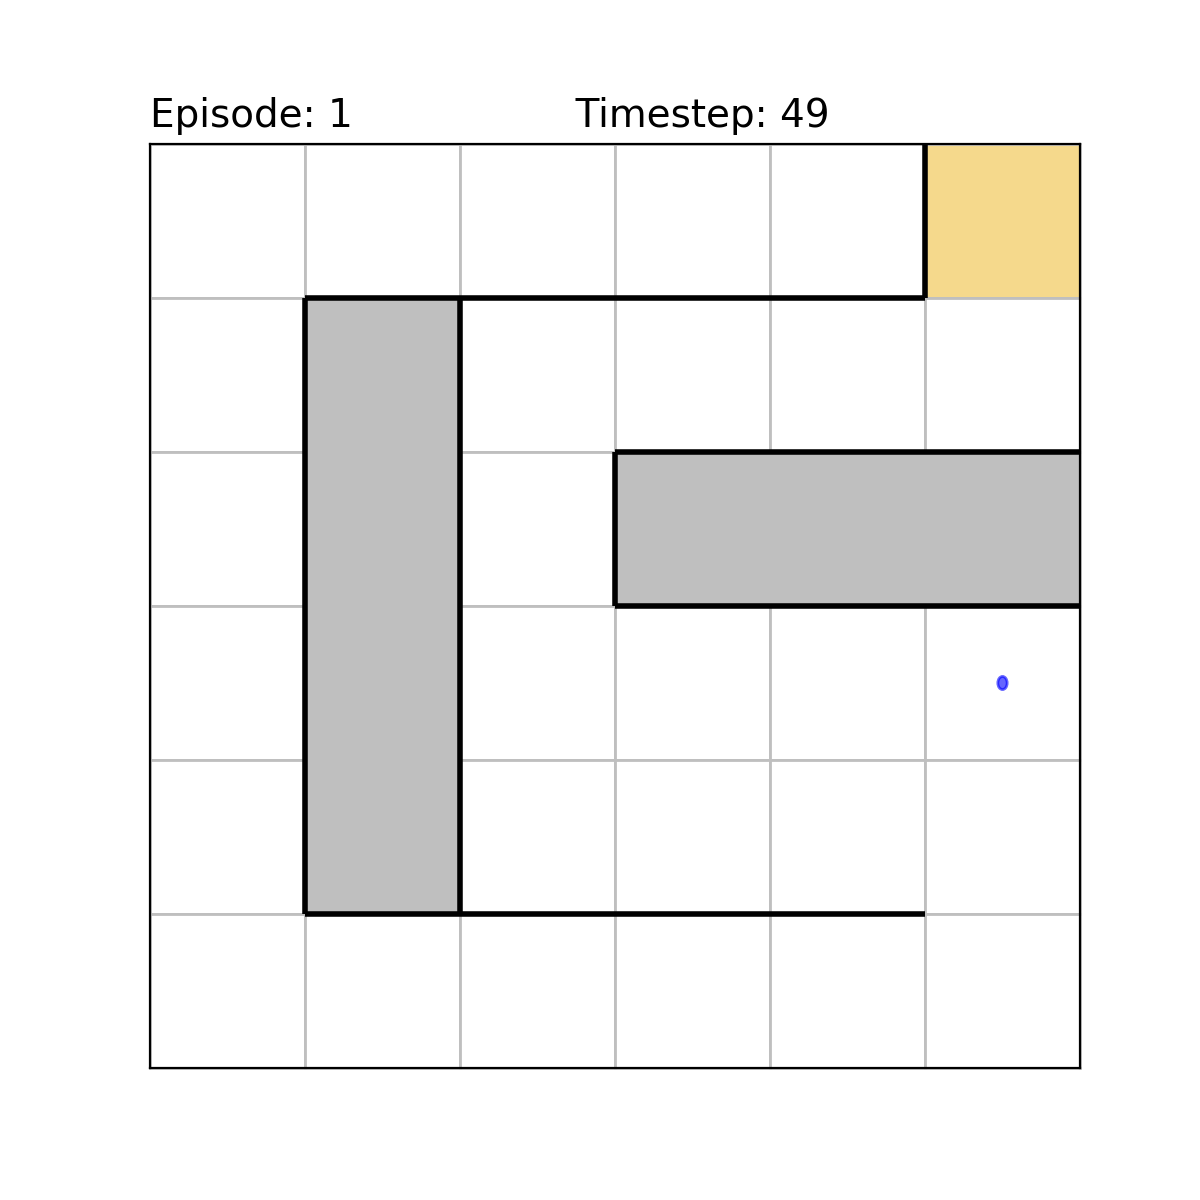

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [37]:
plotter = maze_plotter(env, 5, gray=[17])
plotter.agent_animation(traj_TAMER, n_episode=1,  nframes=0).save('gen0.gif', writer='imagemagick', fps=5)